#### New to Plotly?
Plotly's Python library is free and open source! [Get started](https://plot.ly/python/getting-started/) by downloading the client and [reading the primer](https://plot.ly/python/getting-started/).
<br>You can set up Plotly to work in [online](https://plot.ly/python/getting-started/#initialization-for-online-plotting) or [offline](https://plot.ly/python/getting-started/#initialization-for-offline-plotting) mode, or in [jupyter notebooks](https://plot.ly/python/getting-started/#start-plotting-online).
<br>We also have a quick-reference [cheatsheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf) (new!) to help you get started!

#### Export Static Images Online
To save the image, you need to login to plotly using [your credentials](https://plot.ly/settings/api) (username and API Key).

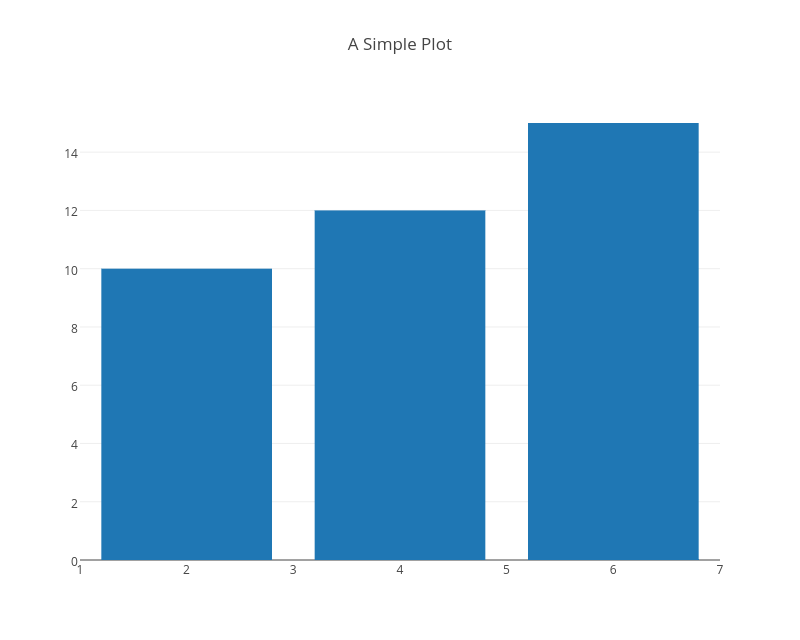

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('DemoAccount', '2qdyfjyr7o') # Replace the username, and API key with your credentials.

trace = go.Bar(x=[2, 4, 6], y= [10, 12, 15])
data = [trace]
layout = go.Layout(title='A Simple Plot', width=800, height=640)
fig = go.Figure(data=data, layout=layout)

py.image.save_as(fig, filename='a-simple-plot.png')

from IPython.display import Image
Image('a-simple-plot.png')

#### Embed Static Images in Jupyter Notebooks
You can also directly render the image inside the IPython notebook using the utility function `ishow`. It is similar to Matplotlib's `imshow` method:

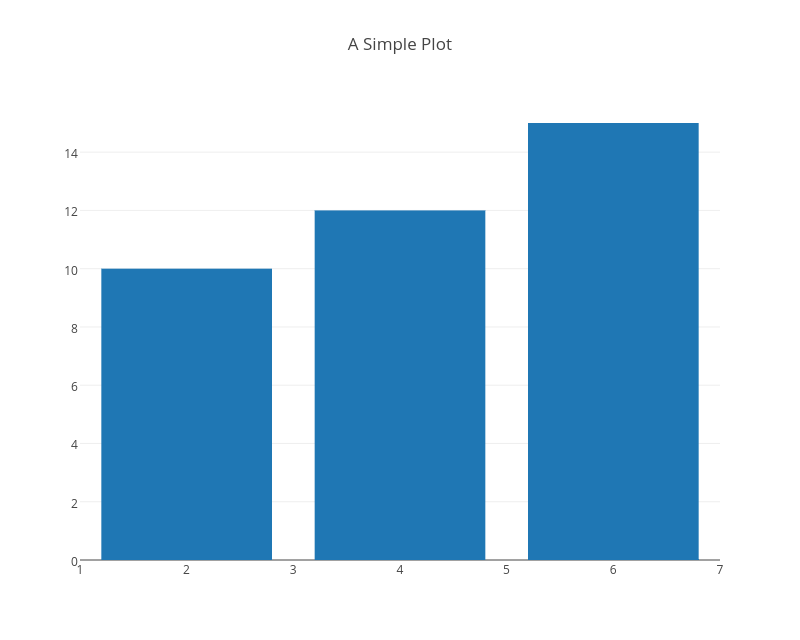

In [2]:
py.image.ishow(fig)

#### Retrieve an Image from an Existing Online Chart
To export an image of a chart you (or someone else) have already created, first you can retreive it using `get_figure` method, and then save it.

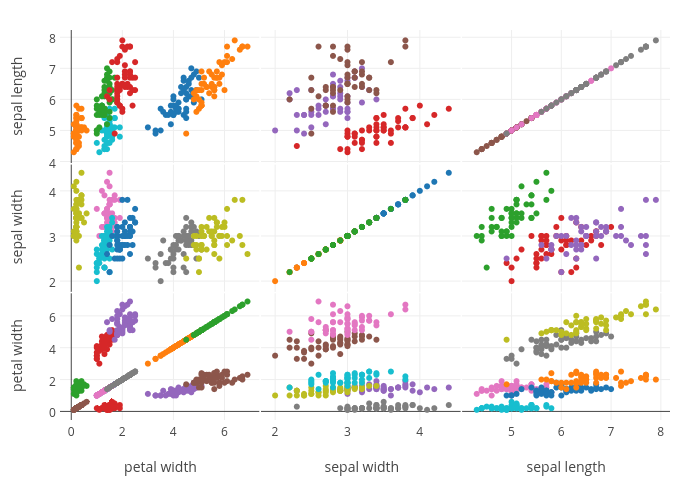

In [3]:
fig = py.get_figure('chris', '1638')
py.image.save_as(fig,'chris-plot.png')

Image('chris-plot.png') # Display a static image

#### Supported Formats

The common image formats: 'PNG', 'JPG/JPEG' are supported. In addition, formats like 'EPS', 'SVG' and 'PDF' are also available for user with a Personal or Professional subscription. You can get more details on our [pricing page] (https://plot.ly/products/cloud/)

**Note:** It is important to note that any figures containing WebGL traces (i.e. of type scattergl, heatmapgl, contourgl, scatter3d, surface, mesh3d, scatterpolargl, cone, streamtube, splom, or parcoords) that are exported in a vector format like SVG, EPS or PDF will include encapsulated rasters instead of vectors for some parts of the image.


To access the image in a particular format, you can either:
   - append the format extension to the plot url. i.e. the JPG version of the plot: https://plot.ly/~chris/1638 is available at : https://plot.ly/~chris/1638.jpg
   - Add the appropriate extension to the `save_as` method:
     <code> py.image.save_as(fig, 'chris-plot.jpg')</code>
     

#### Saving Image Data in Memory

The data from the charts can also be stored in the memory. This reduces the overhead of saving the image in the hard disk. It is particularly useful when the image needs to be embedded (for example in email reports).

In [4]:
import requests
image_bytes = requests.get('https://plot.ly/~chris/1638.jpg').content

#### Export Static Image Offline

We can use the same `iplot` and `plot` functions as before, but if we want to download these same images, then we'll have to include an additional argument called `image`. `image` will define the format of the image file that is to be downloaded.

```
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode()

offline.iplot({'data': [{'y': [4, 2, 3, 4]}], 
               'layout': {'title': 'Test Plot', 
                          'font': dict(size=16)}},
             image='png')
```
<br>
```
import plotly.offline as offline
import plotly.graph_objs as go

offline.plot({'data': [{'y': [4, 2, 3, 4]}], 
               'layout': {'title': 'Test Plot', 
                          'font': dict(size=16)}},
             image='png')
```

Note that you can also define the `height`, `width` and `filename` of the image. See `help(offline.iplot)` or `help(offline.plot)` for more information.

#### Reference

In [5]:
help(py.image)

Help on class image in module plotly.plotly.plotly:

class image
 |  Helper functions wrapped around plotly's static image generation api.
 |  
 |  Class methods defined here:
 |  
 |  ishow(cls, figure_or_data, format='png', width=None, height=None, scale=None) from __builtin__.classobj
 |      Display a static image of the plot described by `figure_or_data`
 |      in an IPython Notebook.
 |      
 |      positional arguments:
 |      - figure_or_data: The figure dict-like or data list-like object that
 |                        describes a plotly figure.
 |                        Same argument used in `py.plot`, `py.iplot`,
 |                        see https://plot.ly/python for examples
 |      - format: 'png', 'svg', 'jpeg', 'pdf'
 |      - width: output width
 |      - height: output height
 |      - scale: Increase the resolution of the image by `scale` amount
 |             Only valid for PNG and JPEG images.
 |      
 |      example:
 |      ```
 |      import plotly.plotly as

In [7]:
import plotly.offline as offline
help(offline.plot)

Help on function plot in module plotly.offline.offline:

plot(figure_or_data, show_link=True, link_text='Export to plot.ly', validate=True, output_type='file', include_plotlyjs=True, filename='temp-plot.html', auto_open=True, image=None, image_filename='plot_image', image_width=800, image_height=600)
    Create a plotly graph locally as an HTML document or string.
    
    Example:
    ```
    from plotly.offline import plot
    import plotly.graph_objs as go
    
    plot([go.Scatter(x=[1, 2, 3], y=[3, 2, 6])], filename='my-graph.html')
    # We can also download an image of the plot by setting the image parameter
    # to the image format we want
    plot([go.Scatter(x=[1, 2, 3], y=[3, 2, 6])], filename='my-graph.html'
         image='jpeg')
    ```
    More examples below.
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples o

In [8]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install git+https://github.com/plotly/publisher.git --upgrade
import publisher
publisher.publish(
    'static-image-export.ipynb', 'python/static-image-export/', 'Static Image Export | plotly',
    'Plotly allows you to save static images of your plots. Save the image to your local computer, or embed it inside your Jupyter notebooks as a static image.',
    title = 'Static Image Export | plotly',
    name = 'Static Image Export',
    thumbnail='thumbnail/png-export.png', language='python',
    page_type='example_index', has_thumbnail='true', display_as='file_settings', order=1,
    ipynb='~notebook_demo/21')

/usr/local/lib/python2.7/site-packages/IPython/nbconvert.py:13: ShimWarning:

The `IPython.nbconvert` package has been deprecated. You should import from nbconvert instead.

/usr/local/lib/python2.7/site-packages/publisher/publisher.py:53: UserWarning:

Did you "Save" this notebook before running this command? Remember to save, always save.

